Average Body Length: 3978.31 characters


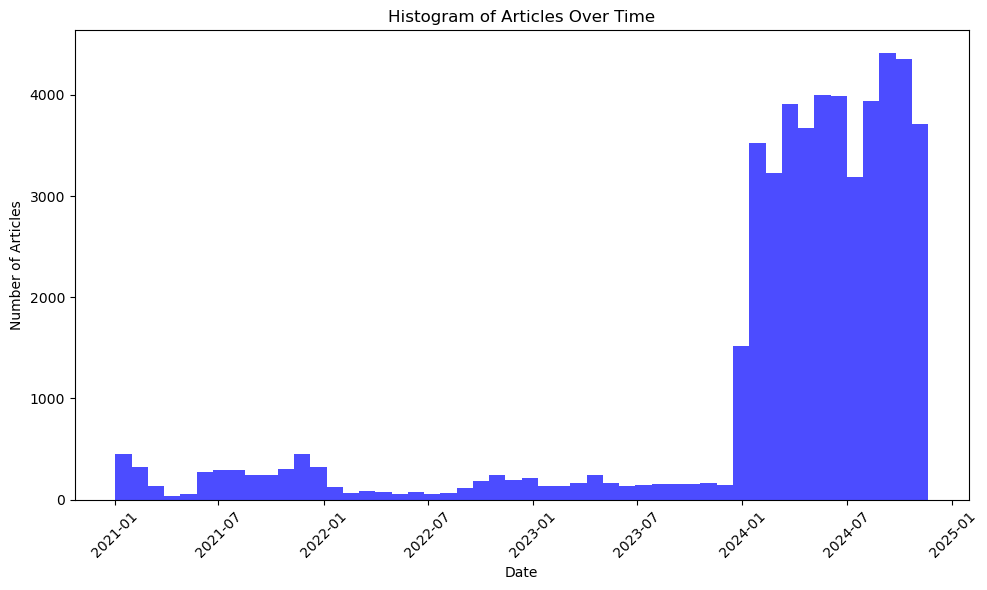

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined news data CSV file
combined_news_data = pd.read_csv('combined_news_with_bodies.csv')

# Calculate the average length of the body
combined_news_data['body_length'] = combined_news_data['Body'].apply(lambda x: len(str(x)))
average_body_length = combined_news_data['body_length'].mean()
print(f"Average Body Length: {average_body_length:.2f} characters")

# Convert the Timestamp to datetime
combined_news_data['Timestamp'] = pd.to_datetime(combined_news_data['Timestamp'])

# Plot a histogram of the body lengths over time
plt.figure(figsize=(10, 6))
plt.hist(combined_news_data['Timestamp'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Histogram of Articles Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Title Length: 72.76 characters


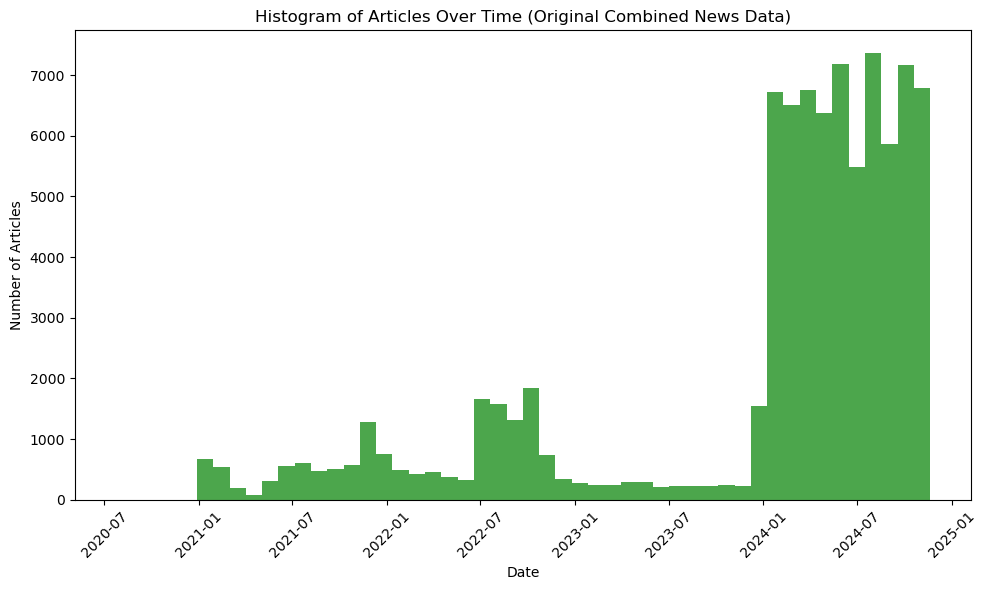

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original combined news data CSV file
original_combined_news_data = pd.read_csv('processed/combined_news_data.csv')

# Calculate the average length of the title
original_combined_news_data['title_length'] = original_combined_news_data['title'].apply(lambda x: len(str(x)))
average_title_length = original_combined_news_data['title_length'].mean()
print(f"Average Title Length: {average_title_length:.2f} characters")

# Convert the datetime column to datetime format
original_combined_news_data['datetime'] = pd.to_datetime(original_combined_news_data['datetime'])

# Plot a histogram of the articles over time
plt.figure(figsize=(10, 6))
plt.hist(original_combined_news_data['datetime'], bins=50, color='green', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Histogram of Articles Over Time (Original Combined News Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Body Length: 3978.31 characters


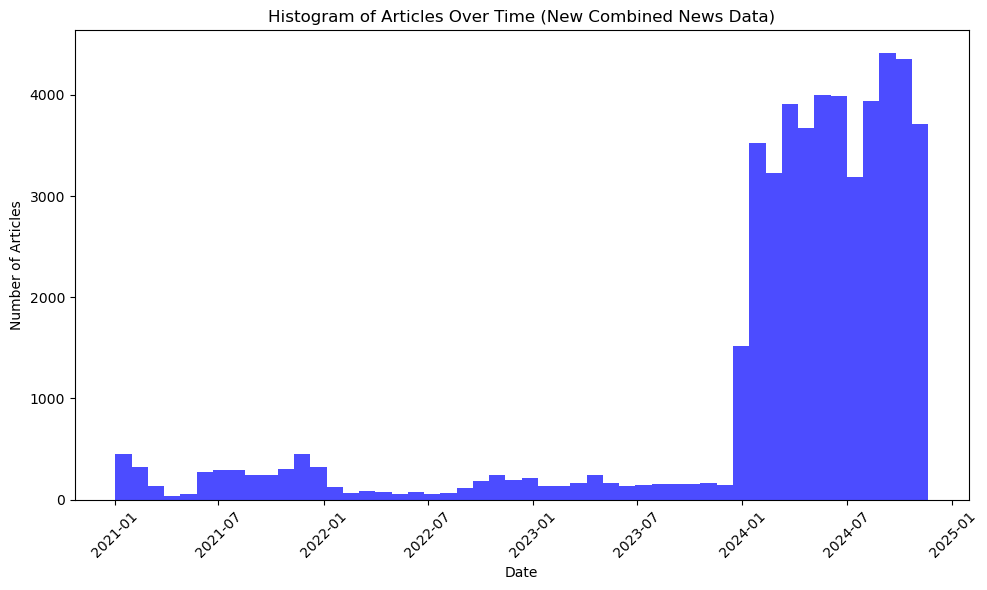

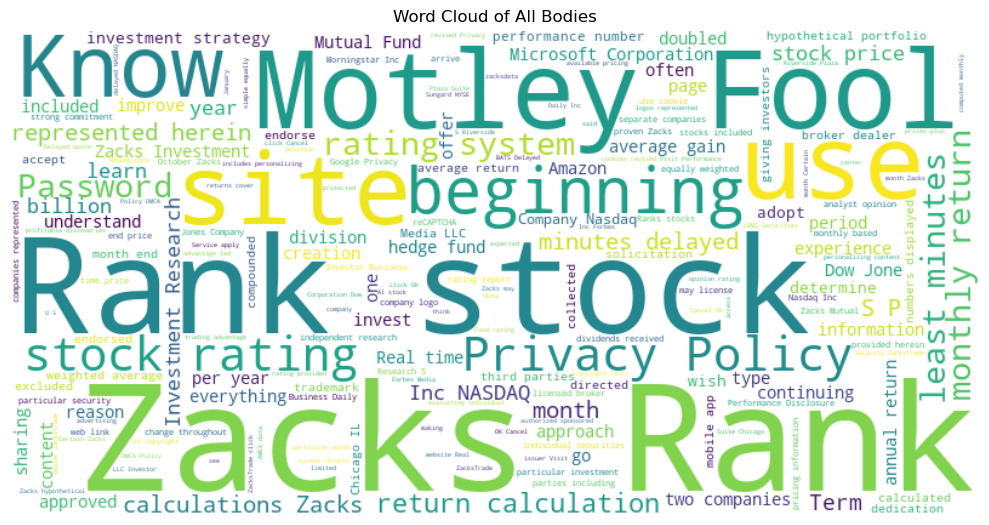

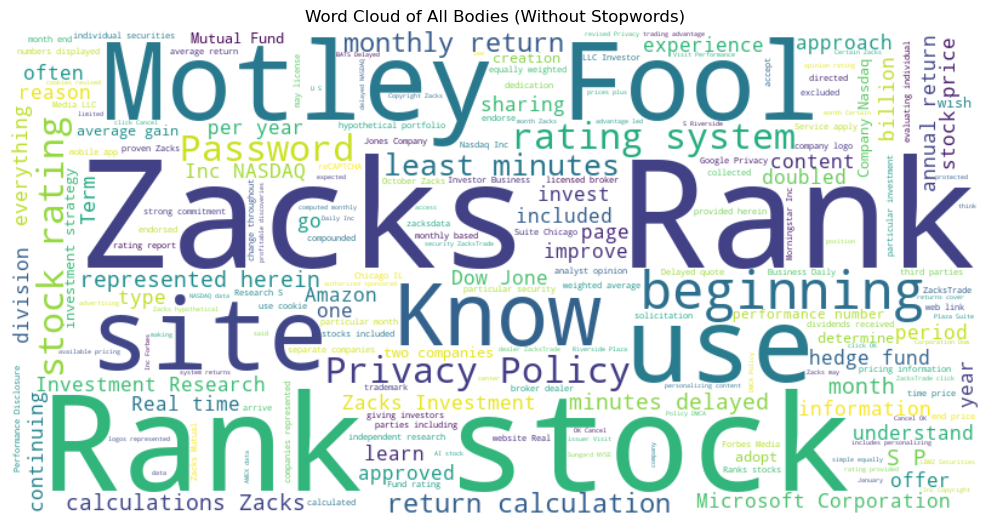

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load the new dataset with body CSV file
new_combined_news_data = pd.read_csv('combined_news_with_bodies.csv')

# Calculate the average length of the body
new_combined_news_data['body_length'] = new_combined_news_data['Body'].apply(lambda x: len(str(x)))
average_body_length = new_combined_news_data['body_length'].mean()
print(f"Average Body Length: {average_body_length:.2f} characters")

# Convert the datetime column to datetime format
new_combined_news_data['datetime'] = pd.to_datetime(new_combined_news_data['Timestamp'])

# Plot a histogram of the articles over time
plt.figure(figsize=(10, 6))
plt.hist(new_combined_news_data['datetime'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Histogram of Articles Over Time (New Combined News Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate a word cloud for all bodies
all_bodies = ' '.join(new_combined_news_data['Body'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_bodies)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Bodies')
plt.tight_layout()
plt.show()

# Generate a word cloud without stopwords for all bodies
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_bodies)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Bodies (Without Stopwords)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re

# Load the dataset
new_combined_news_data = pd.read_csv('combined_news_with_bodies.csv')

# Function to identify potential ads/promotional content
def is_ad_content(text):
    ad_keywords = ["privacy policy", "password", "motley fool" , "motley fool", "zacks rank", "terms", "disclaimer", "advert"]
    text = text.lower()
    count = sum(1 for word in ad_keywords if word in text)
    return count >= 3  # If three or more ad keywords are present, consider it an ad

# Filter out potential ads/promotional content
filtered_news_data = new_combined_news_data[~new_combined_news_data['Body'].apply(lambda x: is_ad_content(str(x)))].copy()
num_ads_removed = len(new_combined_news_data) - len(filtered_news_data)

# Count the number of NaN rows in the original and filtered dataset
num_nan_rows_original = new_combined_news_data['Body'].isna().sum()
num_nan_rows_filtered = filtered_news_data['Body'].isna().sum()

print(f"Number of articles identified as ads and removed: {num_ads_removed}")
print(f"Number of NaN rows in original dataset: {num_nan_rows_original}")
print(f"Number of NaN rows in filtered dataset: {num_nan_rows_filtered}")

# Calculate the average length of the body for the filtered data
filtered_news_data['body_length'] = filtered_news_data['Body'].apply(lambda x: len(str(x)))
average_body_length = filtered_news_data['body_length'].mean()
print(f"Average Body Length (Filtered Data): {average_body_length:.2f} characters")

# Convert the datetime column to datetime format
filtered_news_data['Timestamp'] = pd.to_datetime(filtered_news_data['Timestamp'], errors='coerce')

# Drop rows where datetime could not be converted
filtered_news_data.dropna(subset=['Timestamp'], inplace=True)

# Save the cleaned dataset to a new CSV file
filtered_news_data.to_csv('cleaned_news_data.csv', index=False)

print("Cleaned dataset saved to 'Seb_Folder/processed/cleaned_news_data.csv'")


Number of articles identified as ads and removed: 21312
Number of NaN rows in original dataset: 0
Number of NaN rows in filtered dataset: 0
Average Body Length (Filtered Data): 3827.58 characters
Cleaned dataset saved to 'Seb_Folder/processed/cleaned_news_data.csv'


Average Body Length: 3827.58 characters


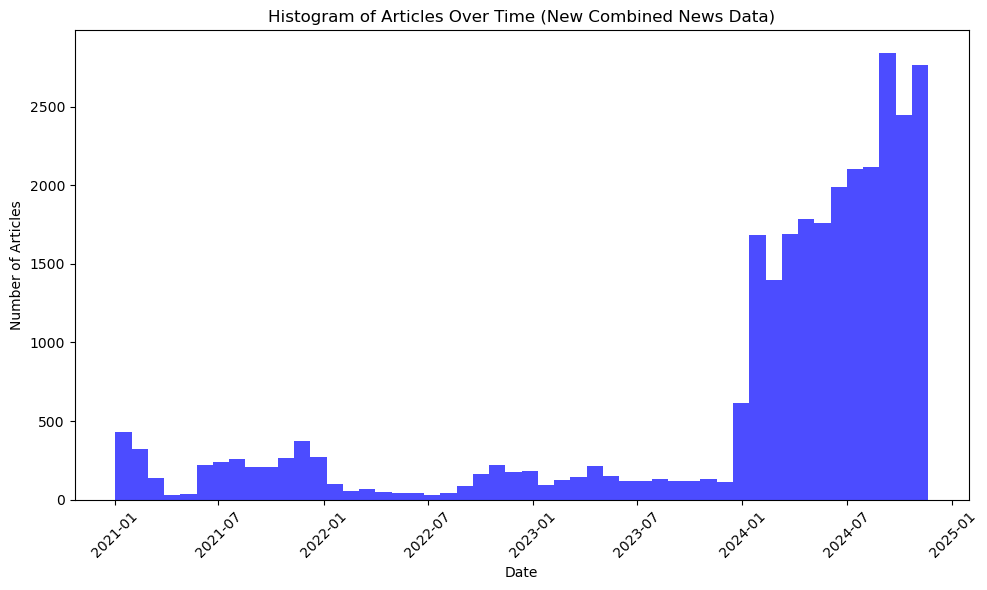

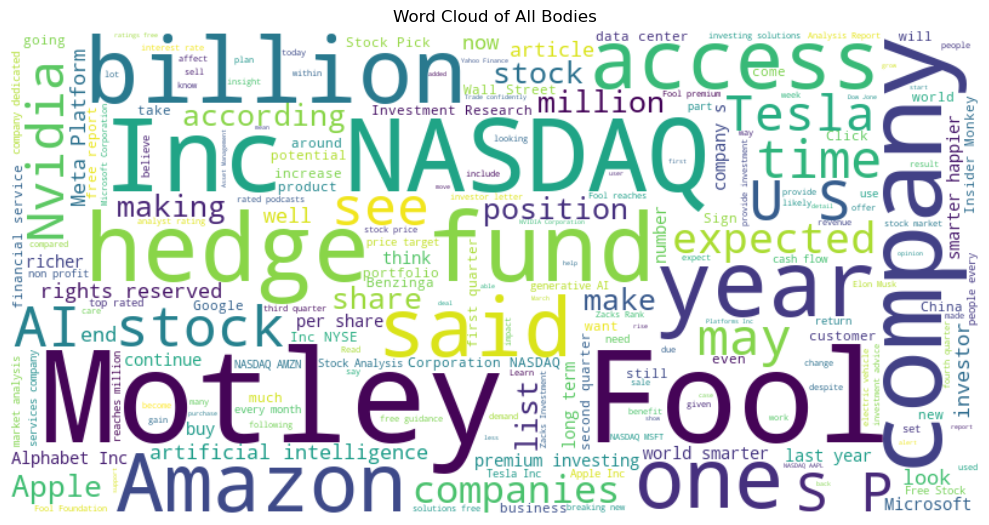

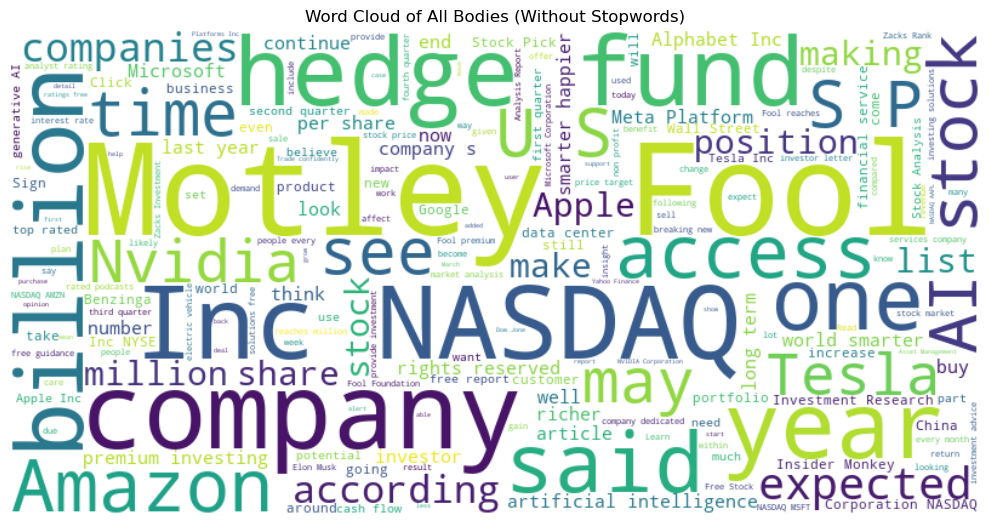

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load the new dataset with body CSV file
new_combined_news_data = pd.read_csv('cleaned_news_data.csv')

# Calculate the average length of the body
new_combined_news_data['body_length'] = new_combined_news_data['Body'].apply(lambda x: len(str(x)))
average_body_length = new_combined_news_data['body_length'].mean()
print(f"Average Body Length: {average_body_length:.2f} characters")

# Convert the datetime column to datetime format
new_combined_news_data['datetime'] = pd.to_datetime(new_combined_news_data['Timestamp'])

# Plot a histogram of the articles over time
plt.figure(figsize=(10, 6))
plt.hist(new_combined_news_data['datetime'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Histogram of Articles Over Time (New Combined News Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate a word cloud for all bodies
all_bodies = ' '.join(new_combined_news_data['Body'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_bodies)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Bodies')
plt.tight_layout()
plt.show()

# Generate a word cloud without stopwords for all bodies
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_bodies)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Bodies (Without Stopwords)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import random
import re

# Load the dataset with the correct delimiter (semicolon)
new_combined_news_data = pd.read_csv('combined_news_with_bodies.csv')

# List of ad-related keywords
ad_keywords = ["privacy policy", "password", "motley fool", "zacks rank", "terms", "disclaimer", "advert"]

# Convert 'Body' column to lowercase
new_combined_news_data['Body'] = new_combined_news_data['Body'].astype(str).str.lower()

# Function to remove unwanted ad-related content
def clean_ad_content(text):
    motley_pattern = r'^founded in 1993, the motley fool is a financial services company dedicated to making the world smarter, happier, and richer\..*?learn more'
    zacks_pattern = r'^we use cookies to understand how you use our site and to improve your experience\..*?terms of service apply\.'
    cleaned_text = re.sub(motley_pattern, '', text, flags=re.DOTALL)
    if re.search(zacks_pattern, text, flags=re.DOTALL):
        return None  # Remove the entire row if it matches the Zacks pattern
    return re.sub(zacks_pattern, '', cleaned_text, flags=re.DOTALL)

# Apply the cleaning function to the 'Body' column and count changes
original_bodies = new_combined_news_data['Body'].copy()
new_combined_news_data['Body'] = new_combined_news_data['Body'].apply(clean_ad_content)

# Drop rows where 'Body' is None or contains empty strings or very short content
def is_valid_body(text):
    return text is not None and len(text) >= 30

new_combined_news_data_cleaned = new_combined_news_data[new_combined_news_data['Body'].apply(is_valid_body)]

print(len(new_combined_news_data_cleaned))

# Re-index both original and cleaned data to align properly for comparison
original_bodies_aligned = original_bodies.loc[new_combined_news_data_cleaned.index]

num_rows_modified = (original_bodies_aligned != new_combined_news_data_cleaned['Body']).sum()
num_rows_removed = len(new_combined_news_data) - len(new_combined_news_data_cleaned)
num_too_small_removed = len(new_combined_news_data) - len(new_combined_news_data_cleaned[new_combined_news_data_cleaned['Body'].apply(lambda x: len(x.strip()) >= 30)])

print(f"Number of rows modified: {num_rows_modified}")
print(f"Number of rows removed: {num_rows_removed}")
print(f"Number of rows removed due to too small content: {num_too_small_removed}")

# Extract random examples for each keyword
for keyword in ad_keywords:
    matches = new_combined_news_data_cleaned[new_combined_news_data_cleaned['Body'].str.contains(keyword, na=False)]
    num_matches = len(matches)
    if num_matches > 0:
        examples = matches['Body'].sample(min(5, num_matches)).tolist()  # Take up to 5 random examples if available
        print(f"Examples containing the keyword '{keyword}' (Total: {num_matches}):")
        for example in examples:
            print(f"- {example[:200]}...")  # Print the first 200 characters for readability
        print("\n")
    else:
        print(f"No examples found for the keyword '{keyword}'.\n")


In [ ]:
import pandas as pd
import re

# Load the dataset with the correct delimiter (semicolon)
new_combined_news_data = pd.read_csv('combined_news_with_bodies.csv')

# Convert 'Body' column to lowercase and remove extra spaces
new_combined_news_data['Body'] = new_combined_news_data['Body'].astype(str).str.lower().str.replace(r'\s+', ' ', regex=True)

# Function to remove unwanted ad-related content
def clean_ad_content(text):
    motley_pattern = r'^founded in 1993, the motley fool is a financial services company dedicated to making the world smarter, happier, and richer\..*?learn more'
    zacks_pattern = r'^we use cookies to understand how you use our site and to improve your experience\..*?terms of service apply\.'
    cleaned_text = re.sub(motley_pattern, '', text, flags=re.DOTALL)
    if re.search(zacks_pattern, text, flags=re.DOTALL):
        return None  # Remove the entire row if it matches the Zacks pattern
    return re.sub(zacks_pattern, '', cleaned_text, flags=re.DOTALL)

# Apply the cleaning function to the 'Body' column
new_combined_news_data['Body'] = new_combined_news_data['Body'].apply(clean_ad_content)

# Drop rows where 'Body' is None or contains empty strings or very short content
new_combined_news_data_cleaned = new_combined_news_data[new_combined_news_data['Body'].apply(lambda x: x is not None and len(x.strip()) >= 30)]

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_combined_news_with_bodies.csv'
new_combined_news_data_cleaned.to_csv(cleaned_file_path, index=False)

# Output summary statistics
original_bodies = new_combined_news_data['Body'].copy()
num_rows_modified = (original_bodies != new_combined_news_data_cleaned['Body']).sum()
num_rows_removed = len(new_combined_news_data) - len(new_combined_news_data_cleaned)
num_too_small_removed = len(new_combined_news_data) - len(new_combined_news_data_cleaned[new_combined_news_data_cleaned['Body'].apply(lambda x: len(x.strip()) >= 30)])

print(f"Number of rows modified: {num_rows_modified}")
print(f"Number of rows removed: {num_rows_removed}")
print(f"Number of rows removed due to too small content: {num_too_small_removed}")
print(f"Cleaned dataset saved to: {cleaned_file_path}")



KeyboardInterrupt



In [5]:
import pandas as pd
from tqdm import tqdm

# Load the dataset
new_combined_news_data = pd.read_csv('cleaned_combined_news_with_bodies.csv')

# Convert 'Body' column to lowercase and remove extra spaces
new_combined_news_data['Body'] = new_combined_news_data['Body'].astype(str).str.lower().str.replace(r'\s+', ' ', regex=True)

# Remove duplicates with progress tracking
tqdm.pandas(desc="Removing duplicates")
new_combined_news_data_cleaned = new_combined_news_data.drop_duplicates(subset='Body', keep='first')

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_combined_news_no_duplicates.csv'
new_combined_news_data_cleaned.to_csv(cleaned_file_path, index=False)

# Output summary statistics
print(f"Number of rows before duplicate removal: {len(new_combined_news_data)}")
print(f"Number of rows after duplicate removal: {len(new_combined_news_data_cleaned)}")
print(f"Cleaned dataset saved to: {cleaned_file_path}")


Number of rows before duplicate removal: 32242
Number of rows after duplicate removal: 30922
Cleaned dataset saved to: cleaned_combined_news_no_duplicates.csv


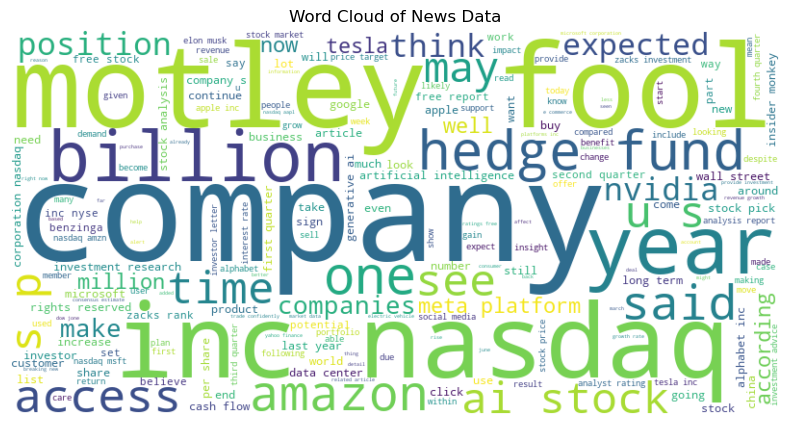

Average word length: 4.80


In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# Load the cleaned dataset
cleaned_file_path = 'cleaned_combined_news_with_bodies.csv'  # Update the path if needed
new_combined_news_data_cleaned = pd.read_csv(cleaned_file_path)

# Combine all the text from the 'Body' column
all_text = ' '.join(new_combined_news_data_cleaned['Body'].dropna().astype(str))

# Remove punctuation and split into words for average length calculation
words = re.findall(r'\b\w+\b', all_text)
average_word_length = sum(len(word) for word in words) / len(words) if words else 0

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Data")
plt.show()

print(f"Average word length: {average_word_length:.2f}")


In [8]:
import pandas as pd

# Load the dataset
cleaned_file_path = 'cleaned_combined_news_no_duplicates.csv'
new_combined_news_data_cleaned = pd.read_csv(cleaned_file_path)

# Calculate the average body length
new_combined_news_data_cleaned['Body_Length'] = new_combined_news_data_cleaned['Body'].astype(str).apply(len)
average_body_length = new_combined_news_data_cleaned['Body_Length'].mean()

print(f"Average body length: {average_body_length:.2f} characters")


Average body length: 4213.38 characters
